# Linear Algebra Operations
### [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


![Data or my instinct](https://www.dropbox.com/s/7i6oc88i8fgyspg/15985289861135144412074065256338.jpg?dl=0)


In [1]:
import numpy as np
import numpy.random as nprd
import numpy.linalg as npla

#### [Python Lists vs. Numpy Arrays](https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference)

In [2]:
python_list = [1,2,3]
python_nparray = np.array([1, 2, 3])
python_list, python_nparray

([1, 2, 3], array([1, 2, 3]))

## Vectors

#### Vector creation

In [3]:
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])
x, y

(array([1, 2, 3]), array([2, 4, 6]))

#### Vector operation

In [4]:
np.sum(x)

6

In [5]:
np.mean(x)

2.0

In [6]:
np.std(x)

0.816496580927726

In [7]:
np.dot(x, y)

28

## Matrices

#### Matrix Creation

In [8]:
A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
A

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [9]:
B = np.ones( (5, 3) )
B

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [10]:
R = nprd.random( (3, 3) )
R

array([[0.27075141, 0.44910993, 0.52847951],
       [0.20715036, 0.9147913 , 0.70283907],
       [0.46050801, 0.96135297, 0.74388442]])

#### Matrix Operation

In [11]:
A

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [12]:
A.T

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [13]:
npla.inv(R)

array([[-0.12078142, -4.35707344,  4.20246997],
       [-4.24681563,  1.0509226 ,  2.02413919],
       [ 5.56310838,  1.3391323 , -3.87315992]])

In [14]:
x

array([1, 2, 3])

In [15]:
R.dot(x)

array([2.75440981, 4.14525016, 4.61486721])

In [16]:
A*x

array([[1, 4, 9],
       [1, 4, 9],
       [1, 4, 9]])

## [Numpy Array Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

---



In [17]:
x = np.arange(4)

print('x: ', x)
print('x shape: ', x.shape)

x:  [0 1 2 3]
x shape:  (4,)


In [18]:
y = np.arange(5)
print('y: ', y)
print('y shape: ', y.shape)

y:  [0 1 2 3 4]
y shape:  (5,)


#### Incorrect Broadcasting

In [19]:
print(x*y)

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

#### Correct Broadcasting

In [20]:
x_prime = x.reshape(4,1)
print(x_prime*y)

[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]]


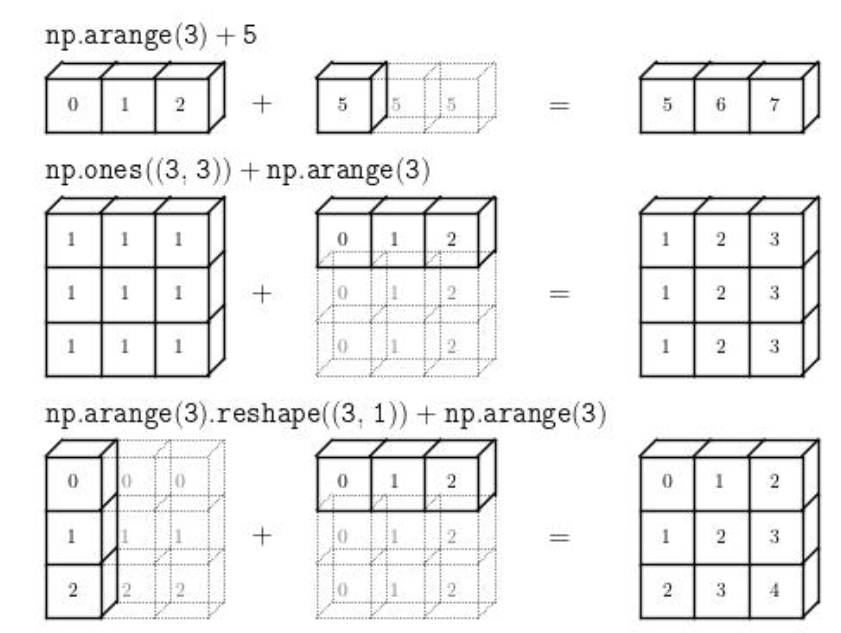

#### For Loop vs. Numpy Array Operations



In [21]:
import time
x = np.arange(10000)
y = np.arange(50)
print('x: ',x)
print()
print('y: ',y)

x:  [   0    1    2 ... 9997 9998 9999]

y:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [22]:
start_loop = time.time()
z = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        z[i,j] =  x[i]*y[j]

end_loop = time.time()
loop_time = end_loop - start_loop
print(z.astype(int))
print()
print('Duration with For loop: ',loop_time)

[[     0      0      0 ...      0      0      0]
 [     0      1      2 ...     47     48     49]
 [     0      2      4 ...     94     96     98]
 ...
 [     0   9997  19994 ... 469859 479856 489853]
 [     0   9998  19996 ... 469906 479904 489902]
 [     0   9999  19998 ... 469953 479952 489951]]

Duration with For loop:  0.677199125289917


In [23]:
start_np = time.time()
x_prime = x.reshape(len(x),1)
z = x_prime*y

end_np = time.time()
np_time = end_np - start_np
print(z)
print()
print('Duration with Numpy Operations: ',np_time)

[[     0      0      0 ...      0      0      0]
 [     0      1      2 ...     47     48     49]
 [     0      2      4 ...     94     96     98]
 ...
 [     0   9997  19994 ... 469859 479856 489853]
 [     0   9998  19996 ... 469906 479904 489902]
 [     0   9999  19998 ... 469953 479952 489951]]

Duration with Numpy Operations:  0.0035305023193359375


In [24]:
speed_up = loop_time/np_time
print("Using Broadcasting with Numpy Operations is",speed_up,"times faster!!!!")

Using Broadcasting with Numpy Operations is 191.81381685575366 times faster!!!!


## Real Example
#### Let's create an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos

#### [What is Kernel](http://setosa.io/ev/image-kernels/)

In [25]:
import scipy.misc
import scipy
ascent = scipy.misc.ascent()
ascent

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [26]:
ascent.shape

(512, 512)

In [27]:
ascent.max()

255

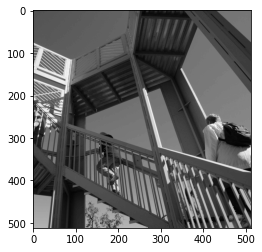

In [28]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(ascent)
plt.show()

**Blur the image: for each pixel, replace the value to the average of its eight neighbors and itself**

In [29]:
F = np.ones((3, 3),np.float32) / 9
F

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [30]:
m, n = ascent.shape
blurred = np.zeros((m, n))

In [31]:
for i in range(1, m-1):
    for j in range(1, n-1):
        blurred[i][j] = np.sum(ascent[i-1:i+2, j-1:j+2] * F)
blurred

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  82.22222283,  82.66666728, ..., 117.00000087,
        117.00000087,   0.        ],
       [  0.        ,  82.00000061,  82.55555617, ..., 117.00000087,
        117.00000087,   0.        ],
       ...,
       [  0.        , 177.66666799, 177.66666799, ...,  56.66666709,
         58.22222266,   0.        ],
       [  0.        , 178.00000133, 178.00000133, ...,  54.0000004 ,
         57.22222265,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

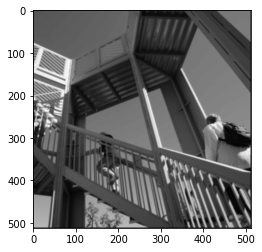

In [32]:
plt.imshow(blurred)
plt.show()

# Matplotlib

In [33]:
import matplotlib.pyplot as plt

#### Scatter Plot

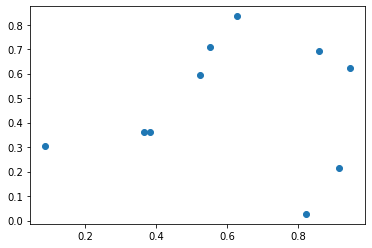

In [34]:
x = nprd.random(10)
y = nprd.random(10)
plt.scatter(x, y)

#### Histogram

In [35]:
x = [1, 2, 2, 2, 3, 2, 1, 3, 2, 2, 4]

(array([2., 6., 2., 1.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

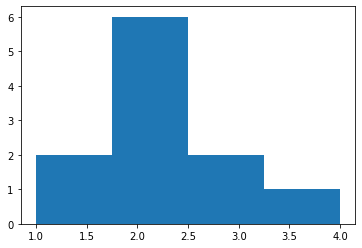

In [36]:
plt.hist(x, bins=4)

#### Lines

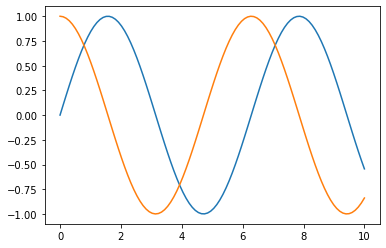

In [37]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

#### Linepoints

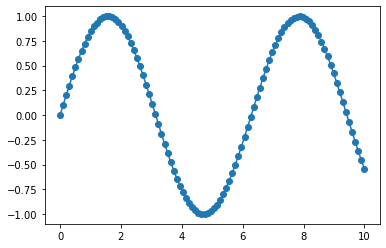

In [38]:
plt.plot(x, np.sin(x), 'o-')
plt.show()

#### Bars

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

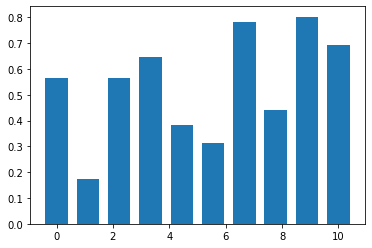

In [39]:
x = np.linspace(0, 10, 10)
y = nprd.random(10)
plt.bar(x, y)
x

# Probability Distributions

## Generate random samples

#### [Uniform Distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)

In [ ]:
x = nprd.uniform(0, 1, 10000)
x.shape

In [ ]:
plt.hist(x, 10)

#### [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

In [ ]:
x = nprd.binomial(10, 0.7, 1000)

In [ ]:
plt.hist(x, 20)

#### [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)

In [ ]:
x = nprd.normal(0, 1.0, 1000)

#### [68–95–99.7 Rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

In [ ]:
plt.hist(x)

#### 2D Gaussian
$$ Covariance = \left( \begin{array}{ccc}  \sigma(x, x) & \sigma(x, y) \\  \sigma(y, x) & \sigma(y, y) \end{array} \right)$$

In [ ]:
mean = [0, 0]
cov = [[1, -20], [-20, 625]] 
x, y = nprd.multivariate_normal(mean, cov, 1000).T


In [ ]:
plt.scatter(x, y)

## Estimate Parameters from Samples

---



In [ ]:
x = nprd.normal(0, 1.0, 1000)

In [ ]:
mu = np.mean(x)
sigma = np.std(x)
mu, sigma

In [ ]:
count, bins, ignored = plt.hist(x, 40, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),  linewidth=2, color='r')
plt.show()

In [ ]:
bins